In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

from generate import *
from helpers import *

### Import model

In [3]:
model = torch.load('models/simple.model')

### Generate text

In [11]:
text, hiddens = generate(model, '\n\n', 500, 0.8, True, output_hiddens=True)
print(text)

ROMEO:
Is mine lord our was sad of thee?

PRINCE EDWARD:
No, pernier onrion: man, naturess,
To his true to a brother well'd for
Be his nurse, I coung a subject and curse.

KING RICHARD III:
Tull my life, look to her whom I am shall as
comes to the resters and present;
How to spent my on for our friends in him; I homort.

GLOUCESTER:
Ratclamend me, homets, who is setties Thood
Would lived, not, gold in the coundoble too false and pated
Like not a colicians? France me a man, I say it.

KING RICHAR


### Generate big plot with all neurons

In [12]:
def big_plot(text, colors, W, zoom=1.0, cols=4, save_file=None):
    ''' Plot wrapped rnn output with each color representing the activation 
        of a certain node in the hidden representation '''
    N = len(colors)
    rows = math.ceil(N/cols)
    
    plt.figure(figsize=(cols*zoom*W/5, rows*zoom*len(text)/W/1.5))
    plt.subplots_adjust(wspace = 0.01, hspace = .01)
    for i in range(N):
        plt.subplot(rows, cols, i+1)
        
        heat = colors[i].flatten()
        wrapped_text, wrapped_heat = wrap_colored_text(text, heat, W=W)
        sns.heatmap(wrapped_heat, annot=wrapped_text, fmt='s',
                    cbar=False, cmap='coolwarm')
        
        plt.xticks([])
        plt.yticks([])
        plt.title('Node {}'.format(i))
    if save_file:
        plt.savefig(save_file)
    plt.show()

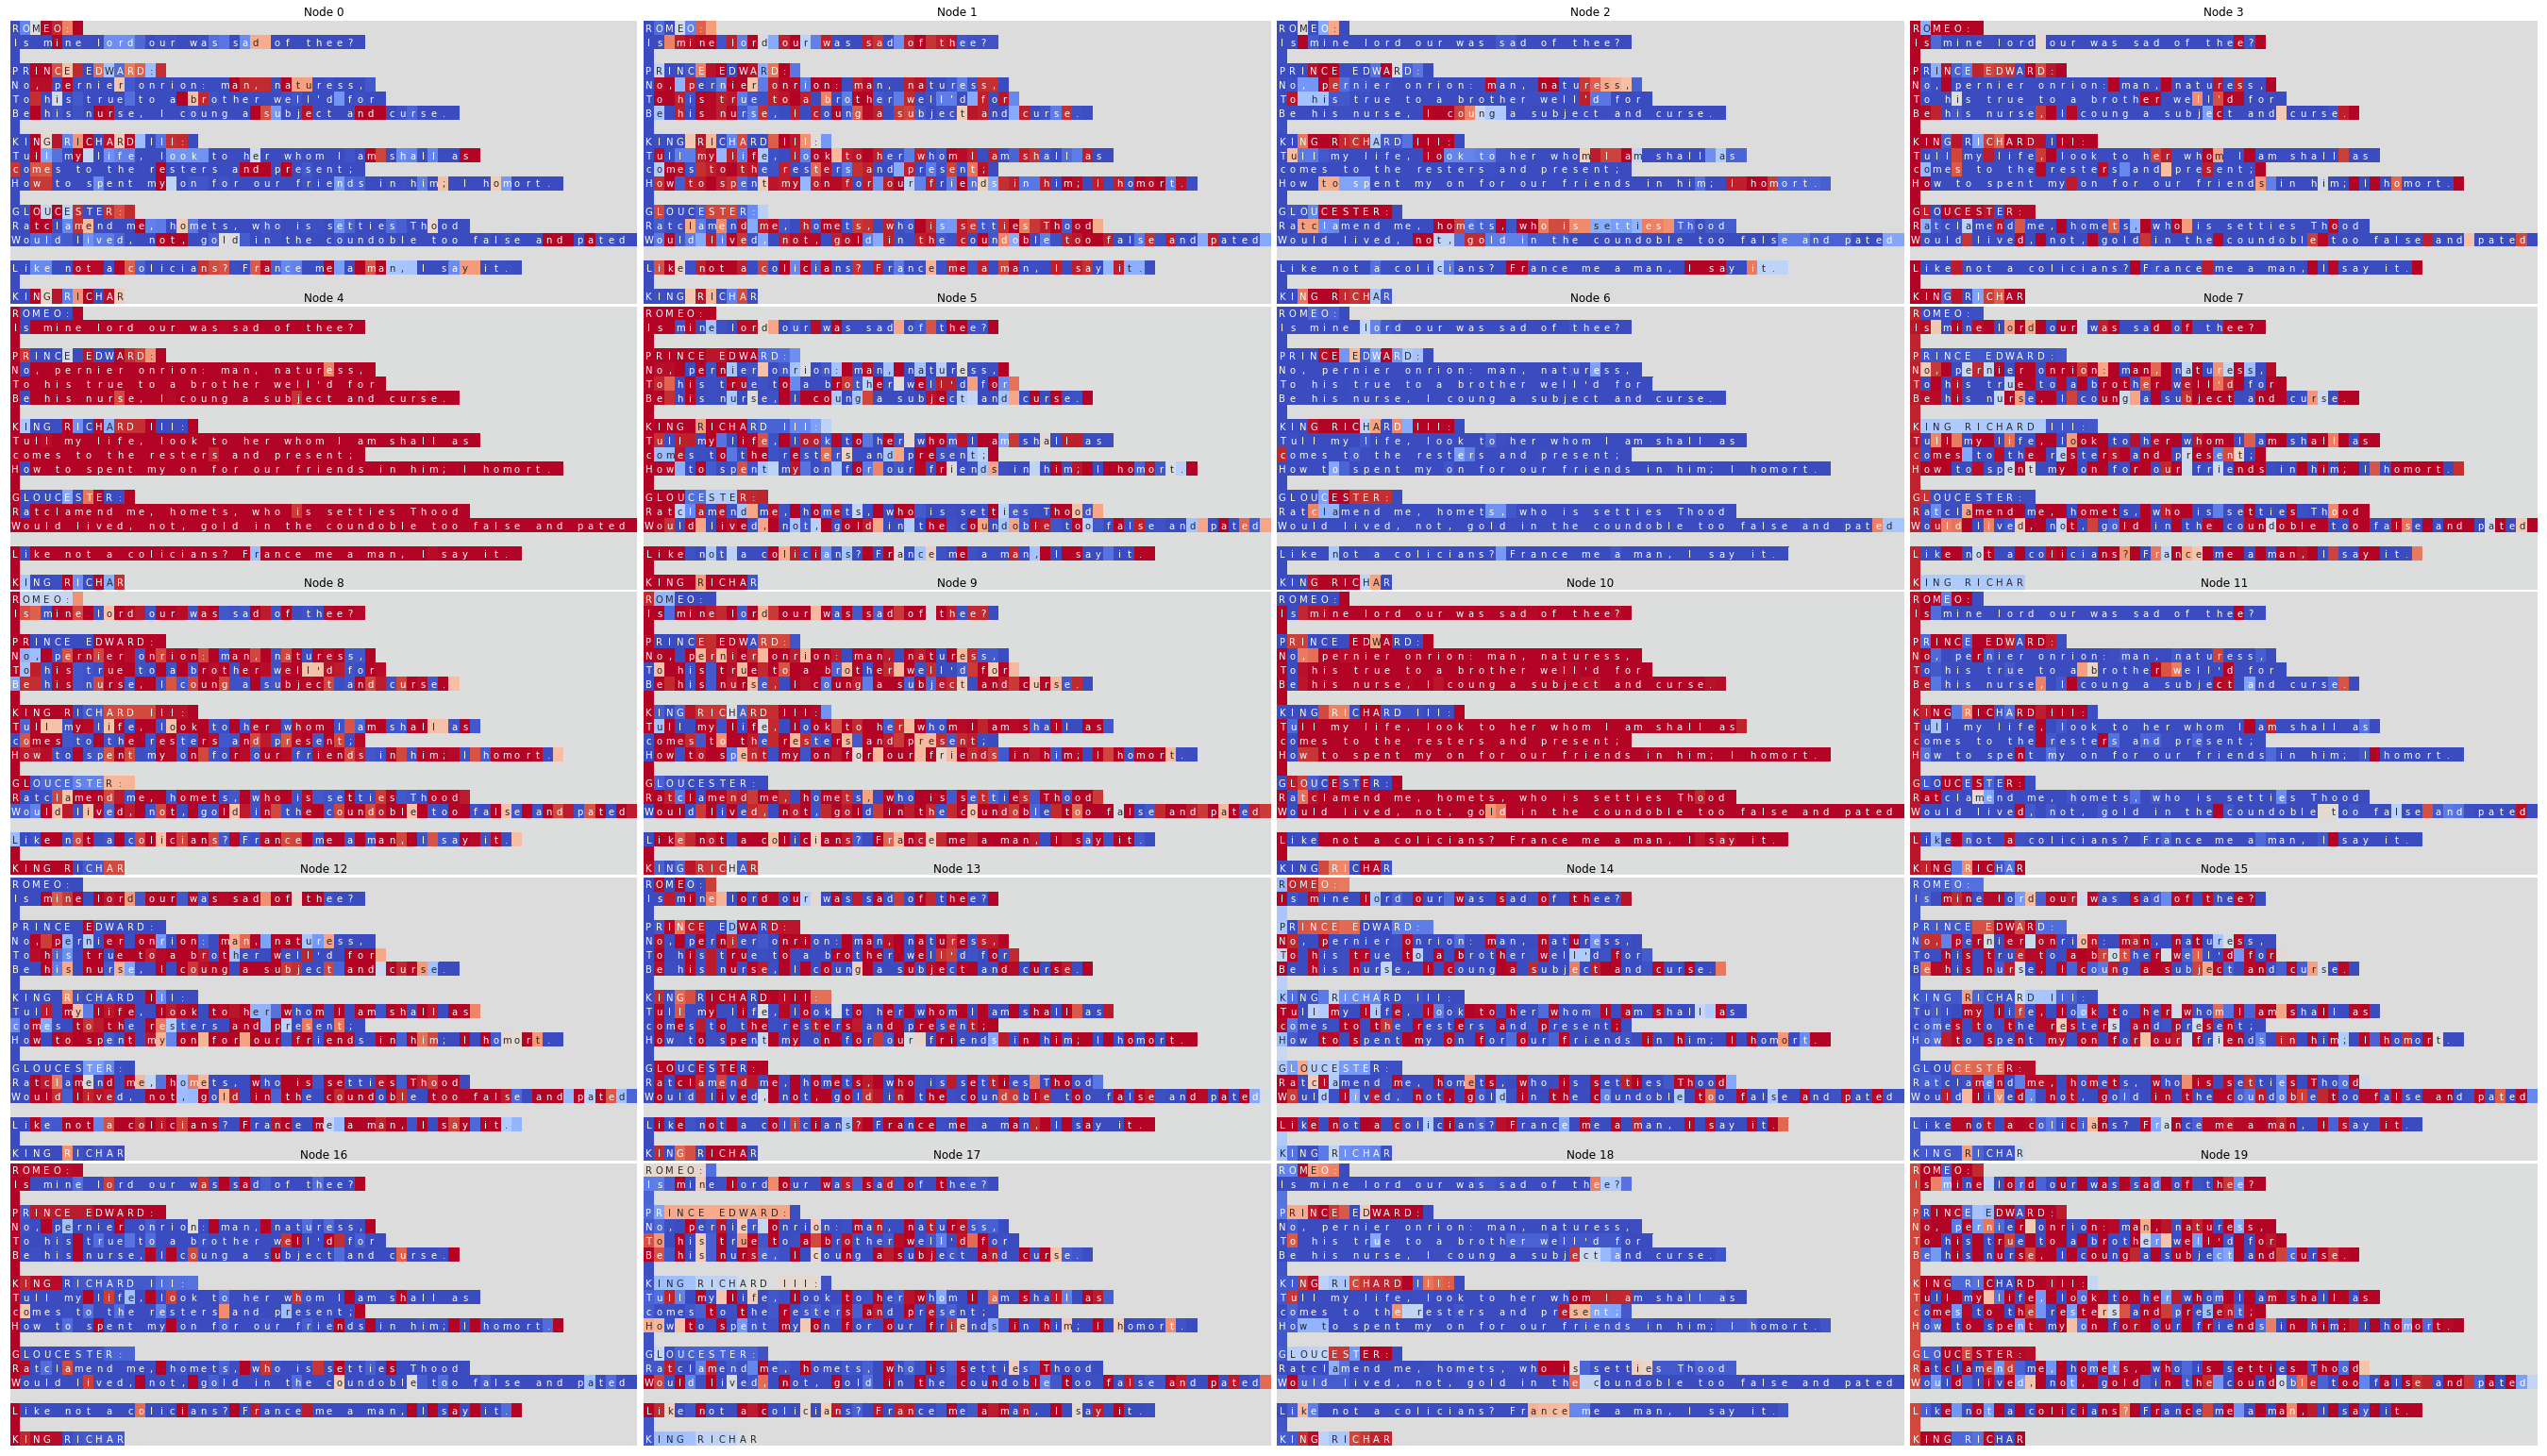

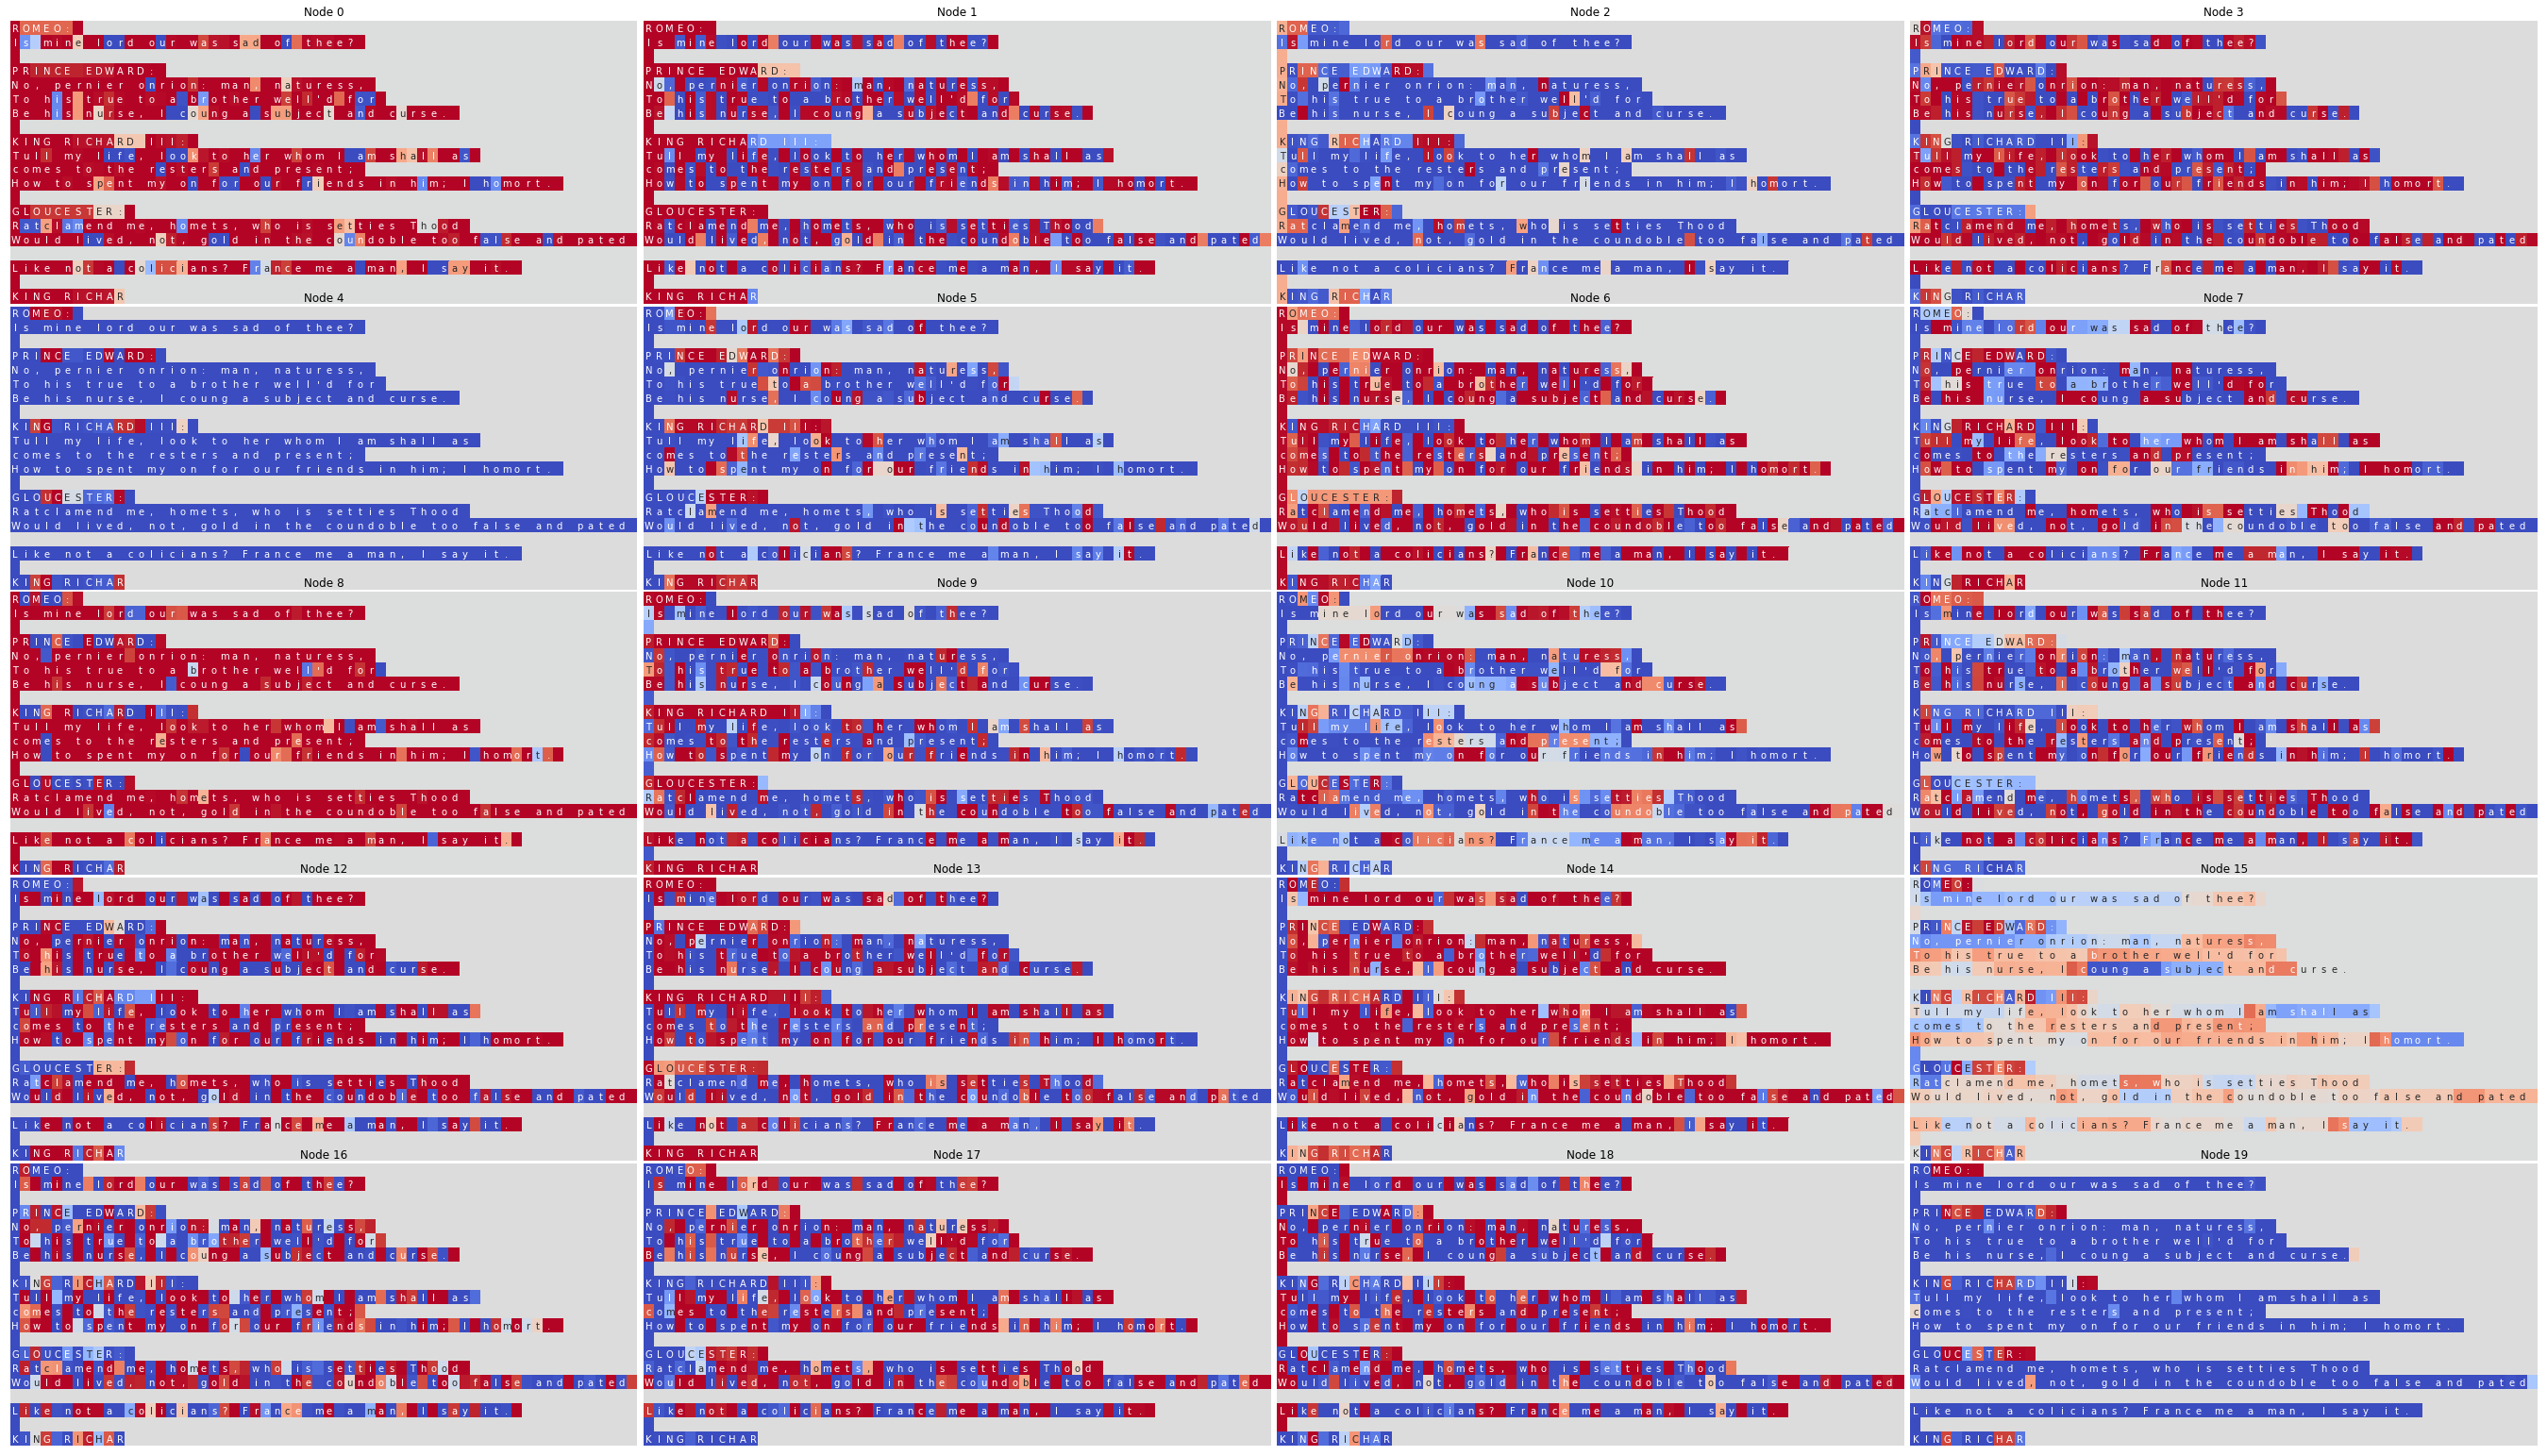

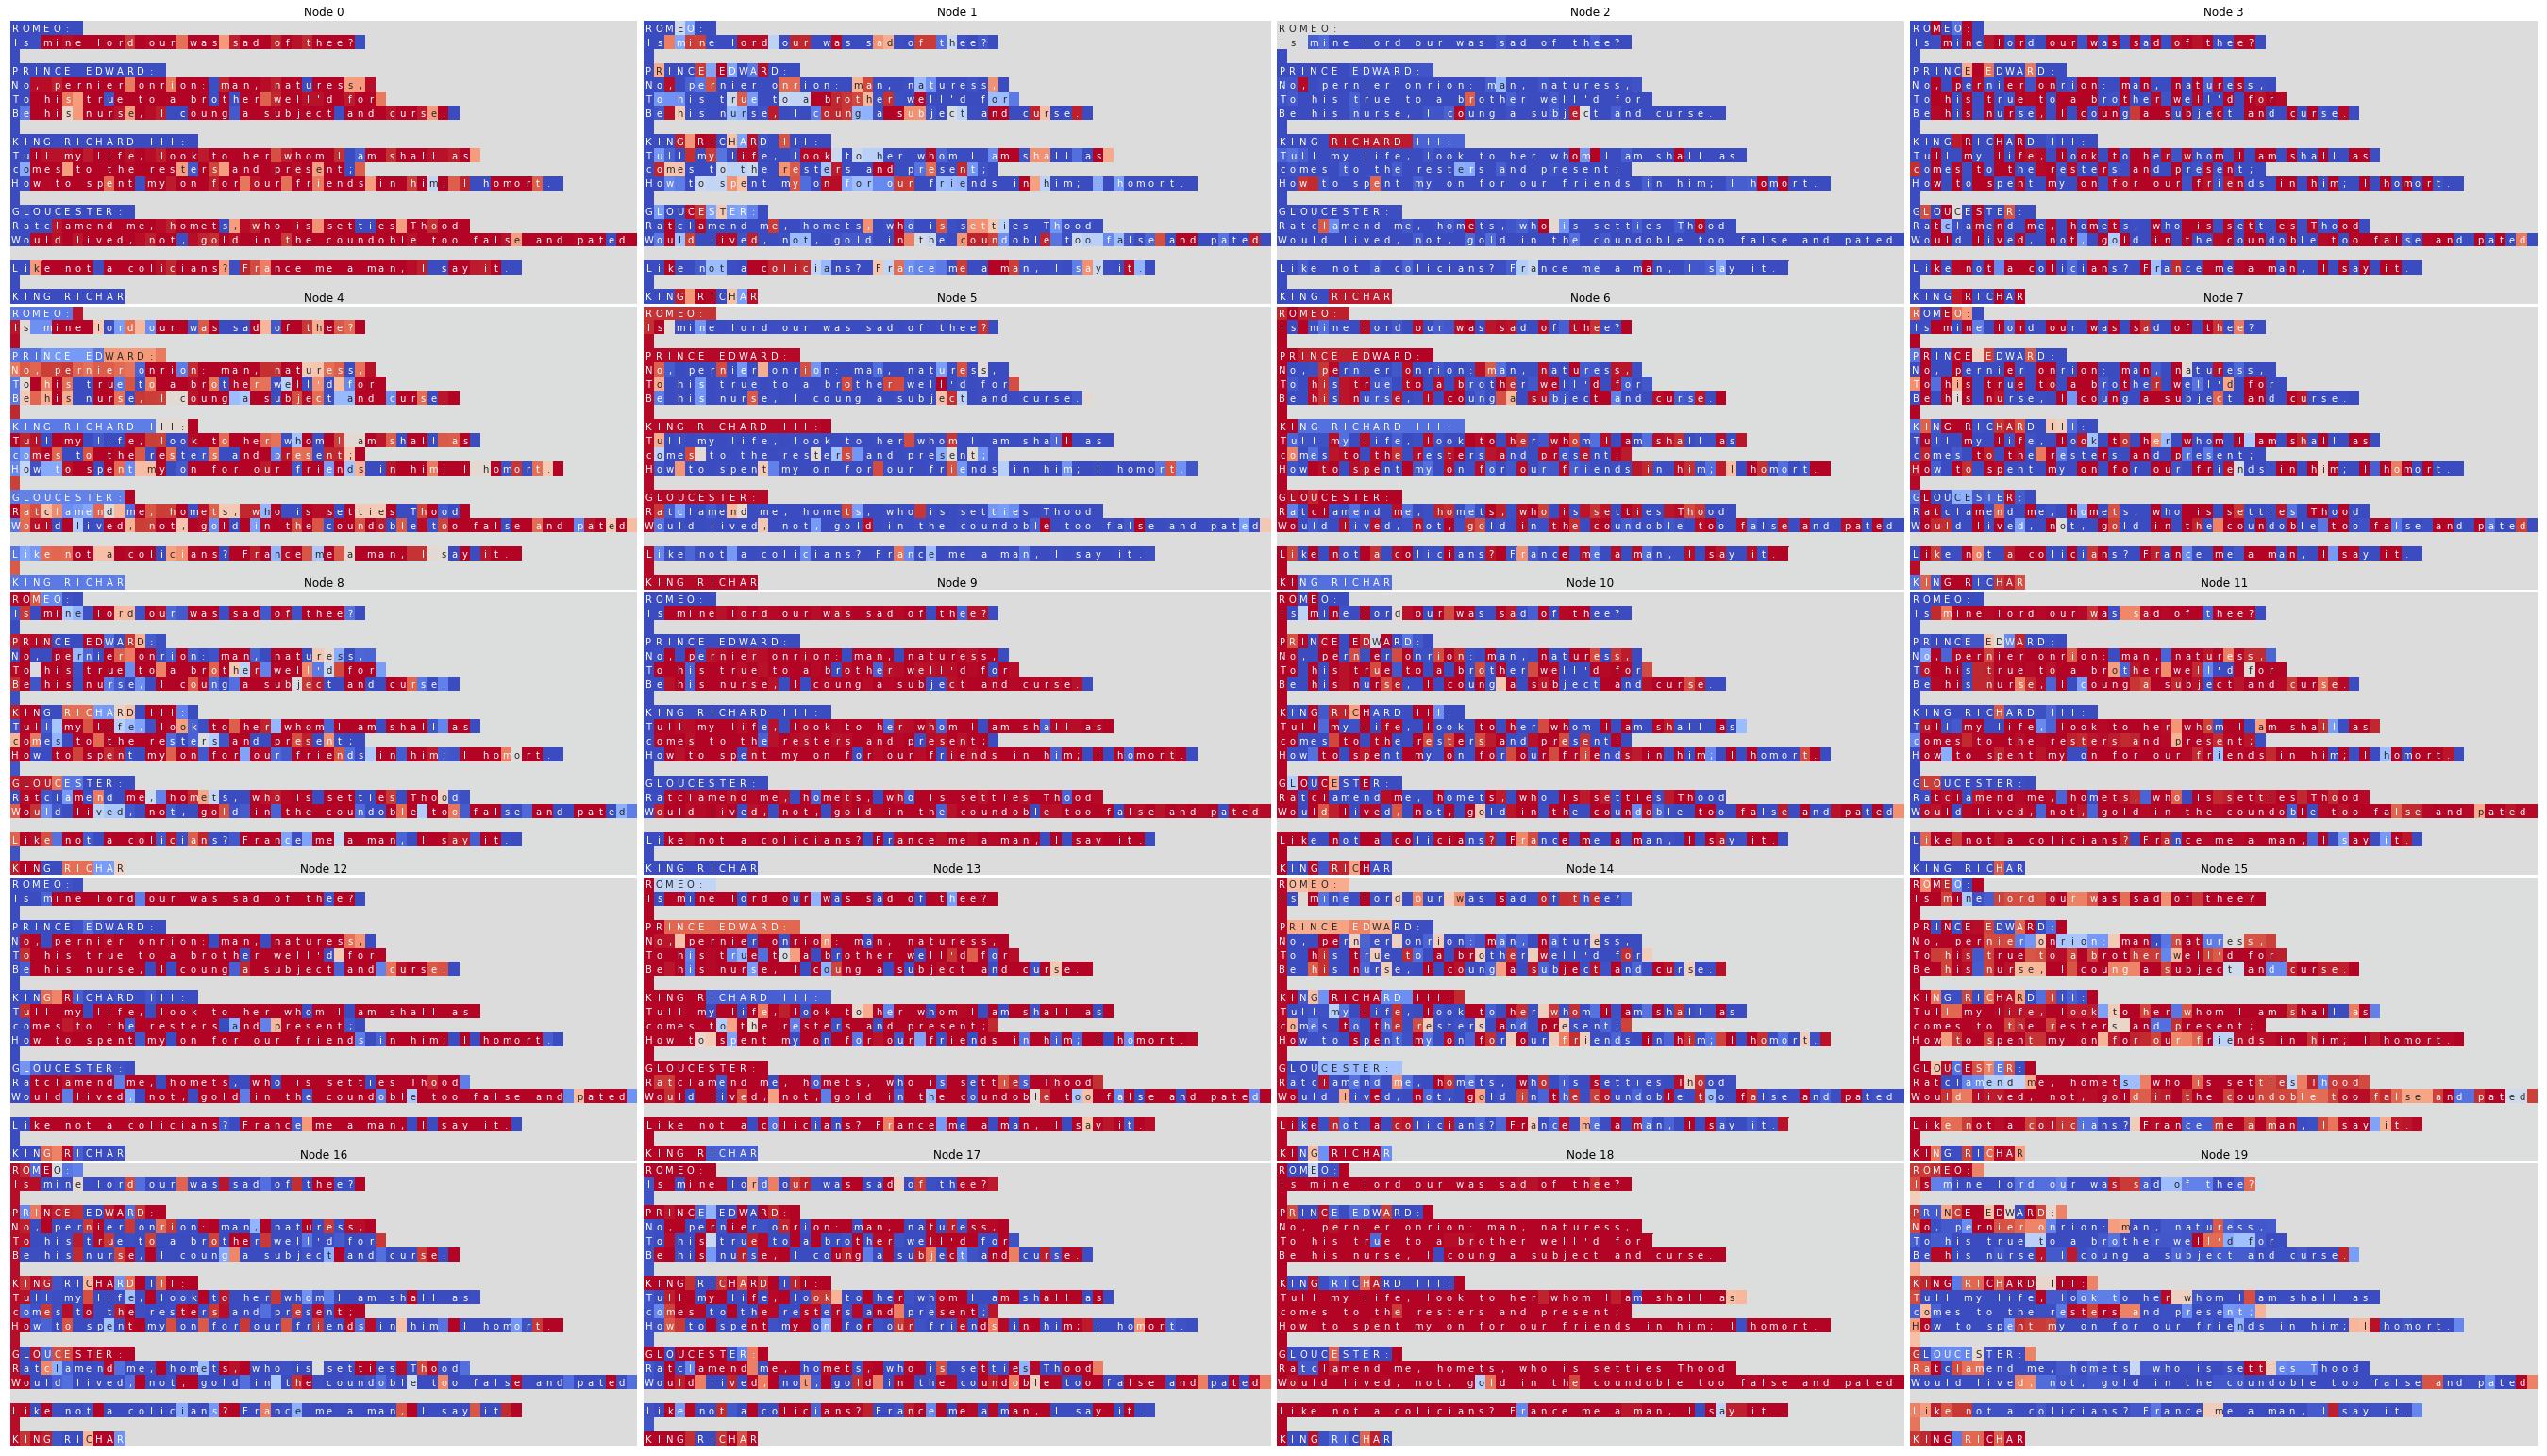

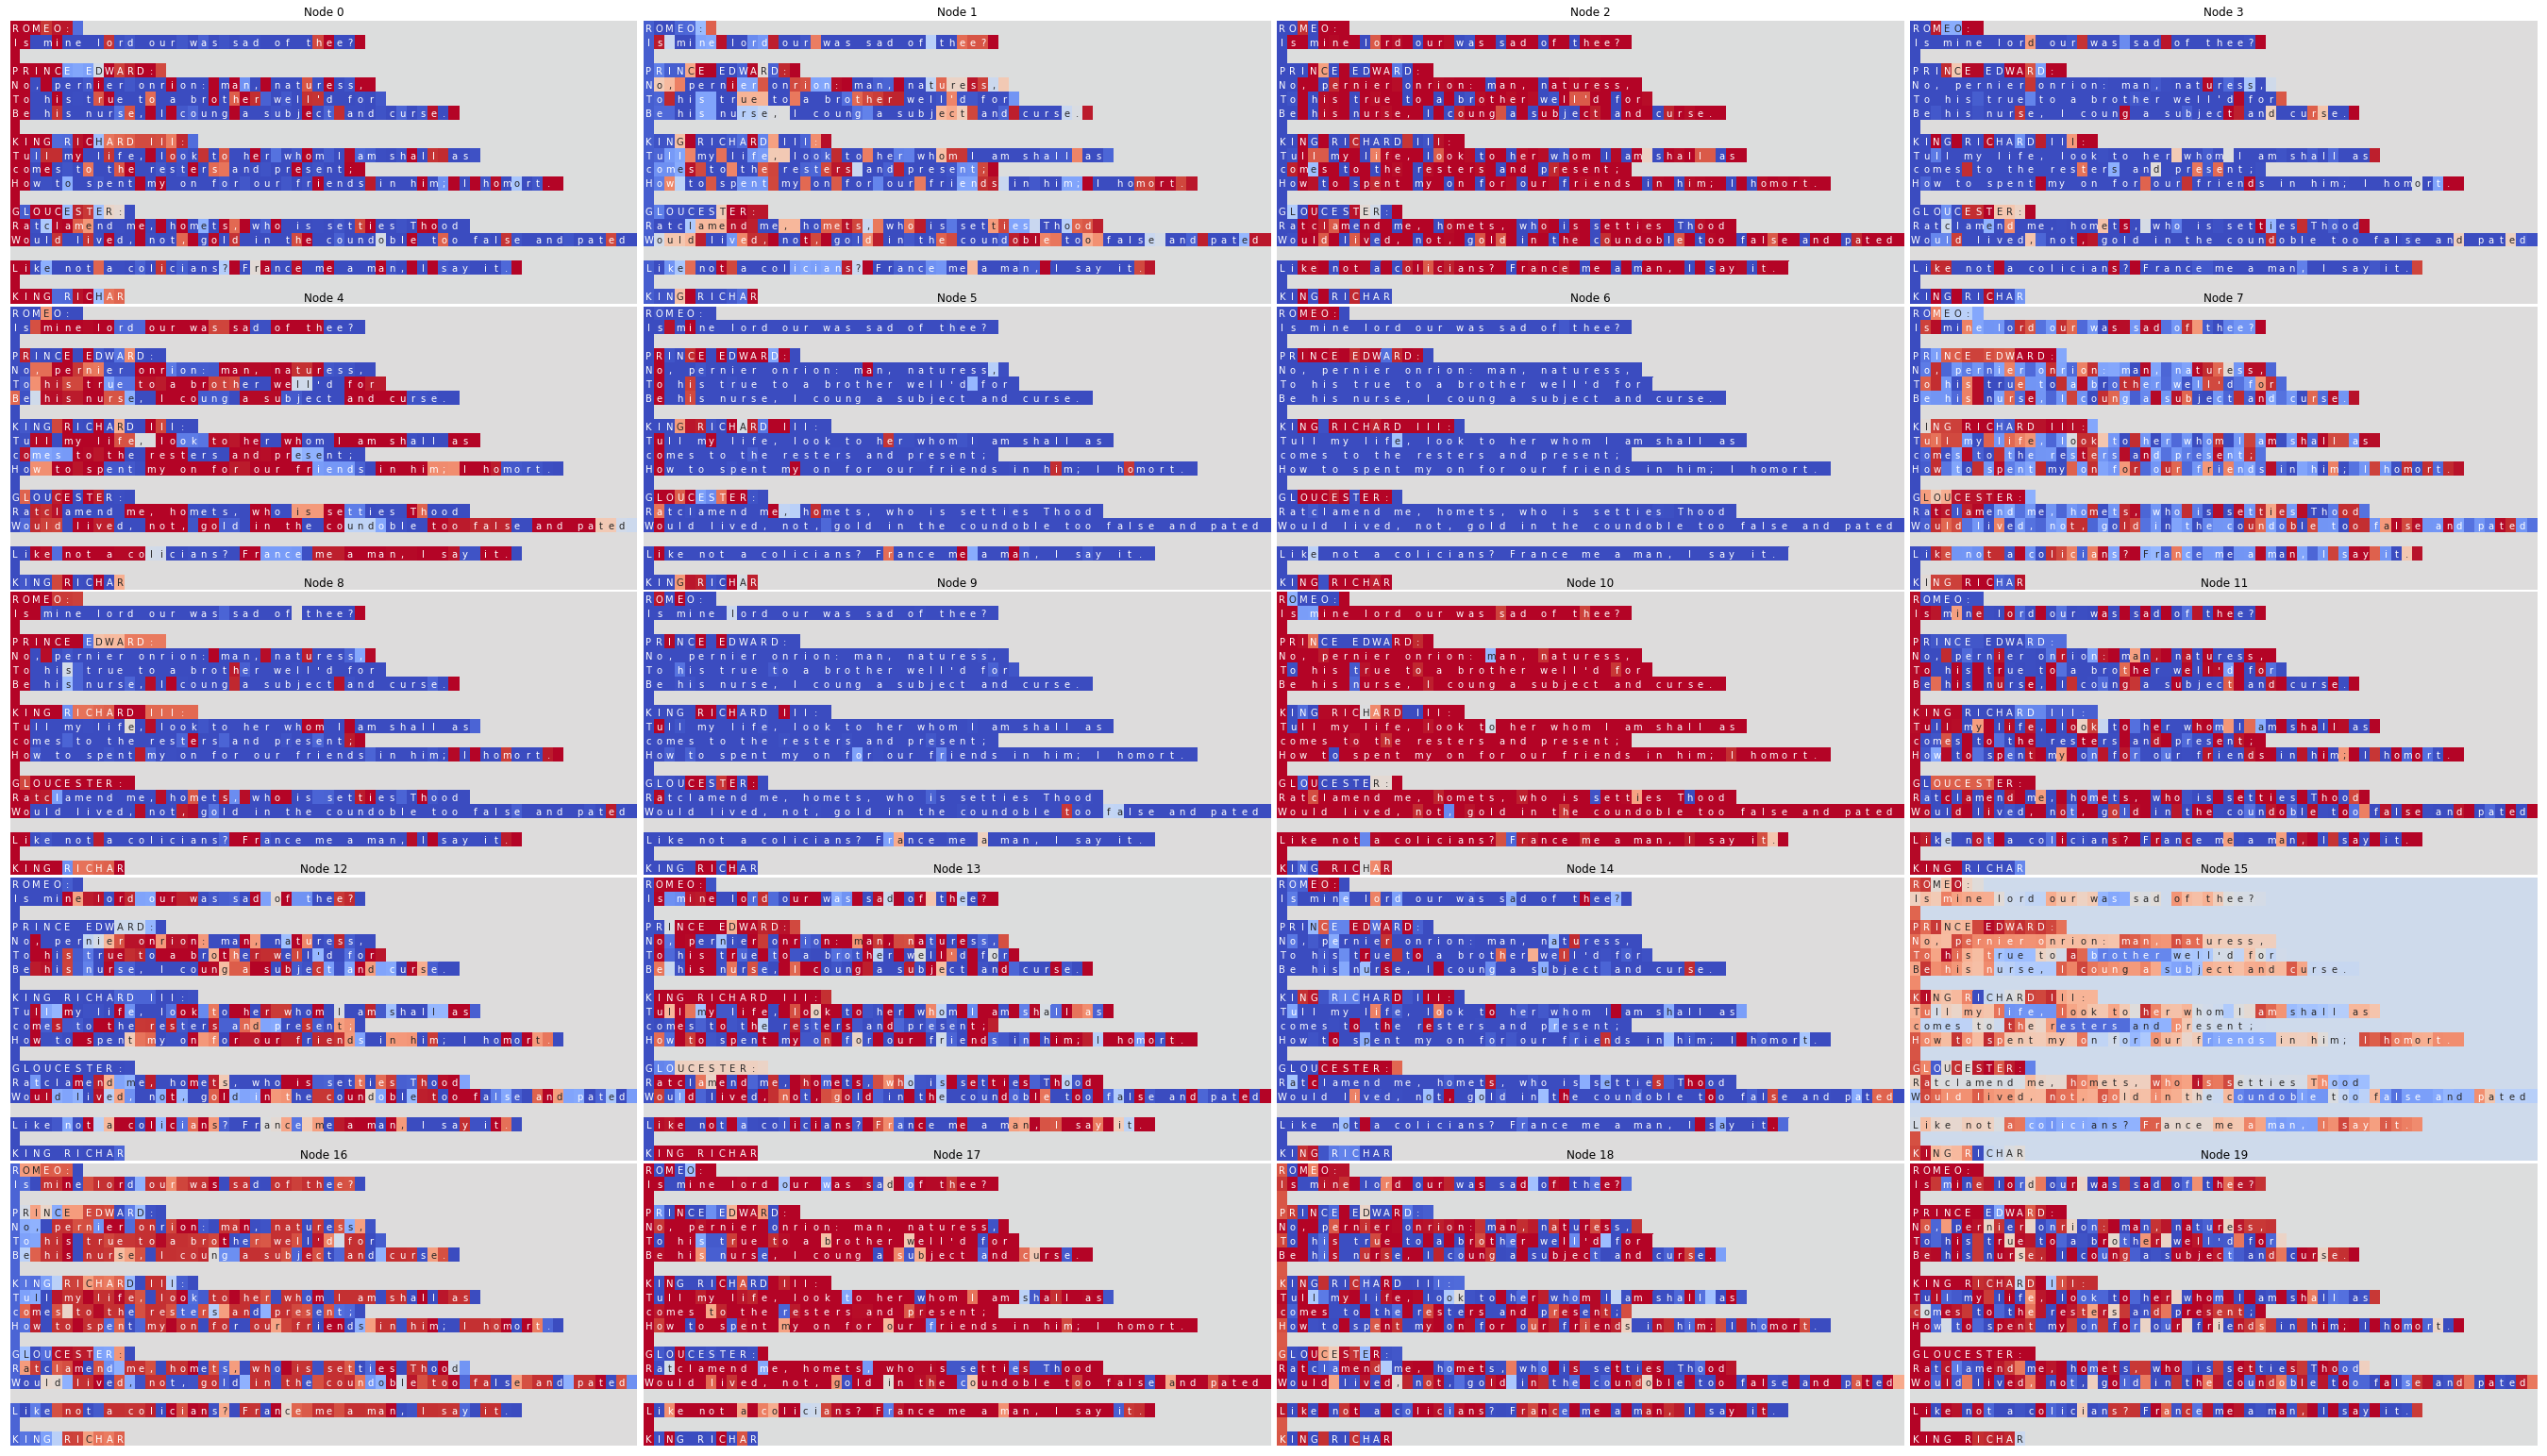

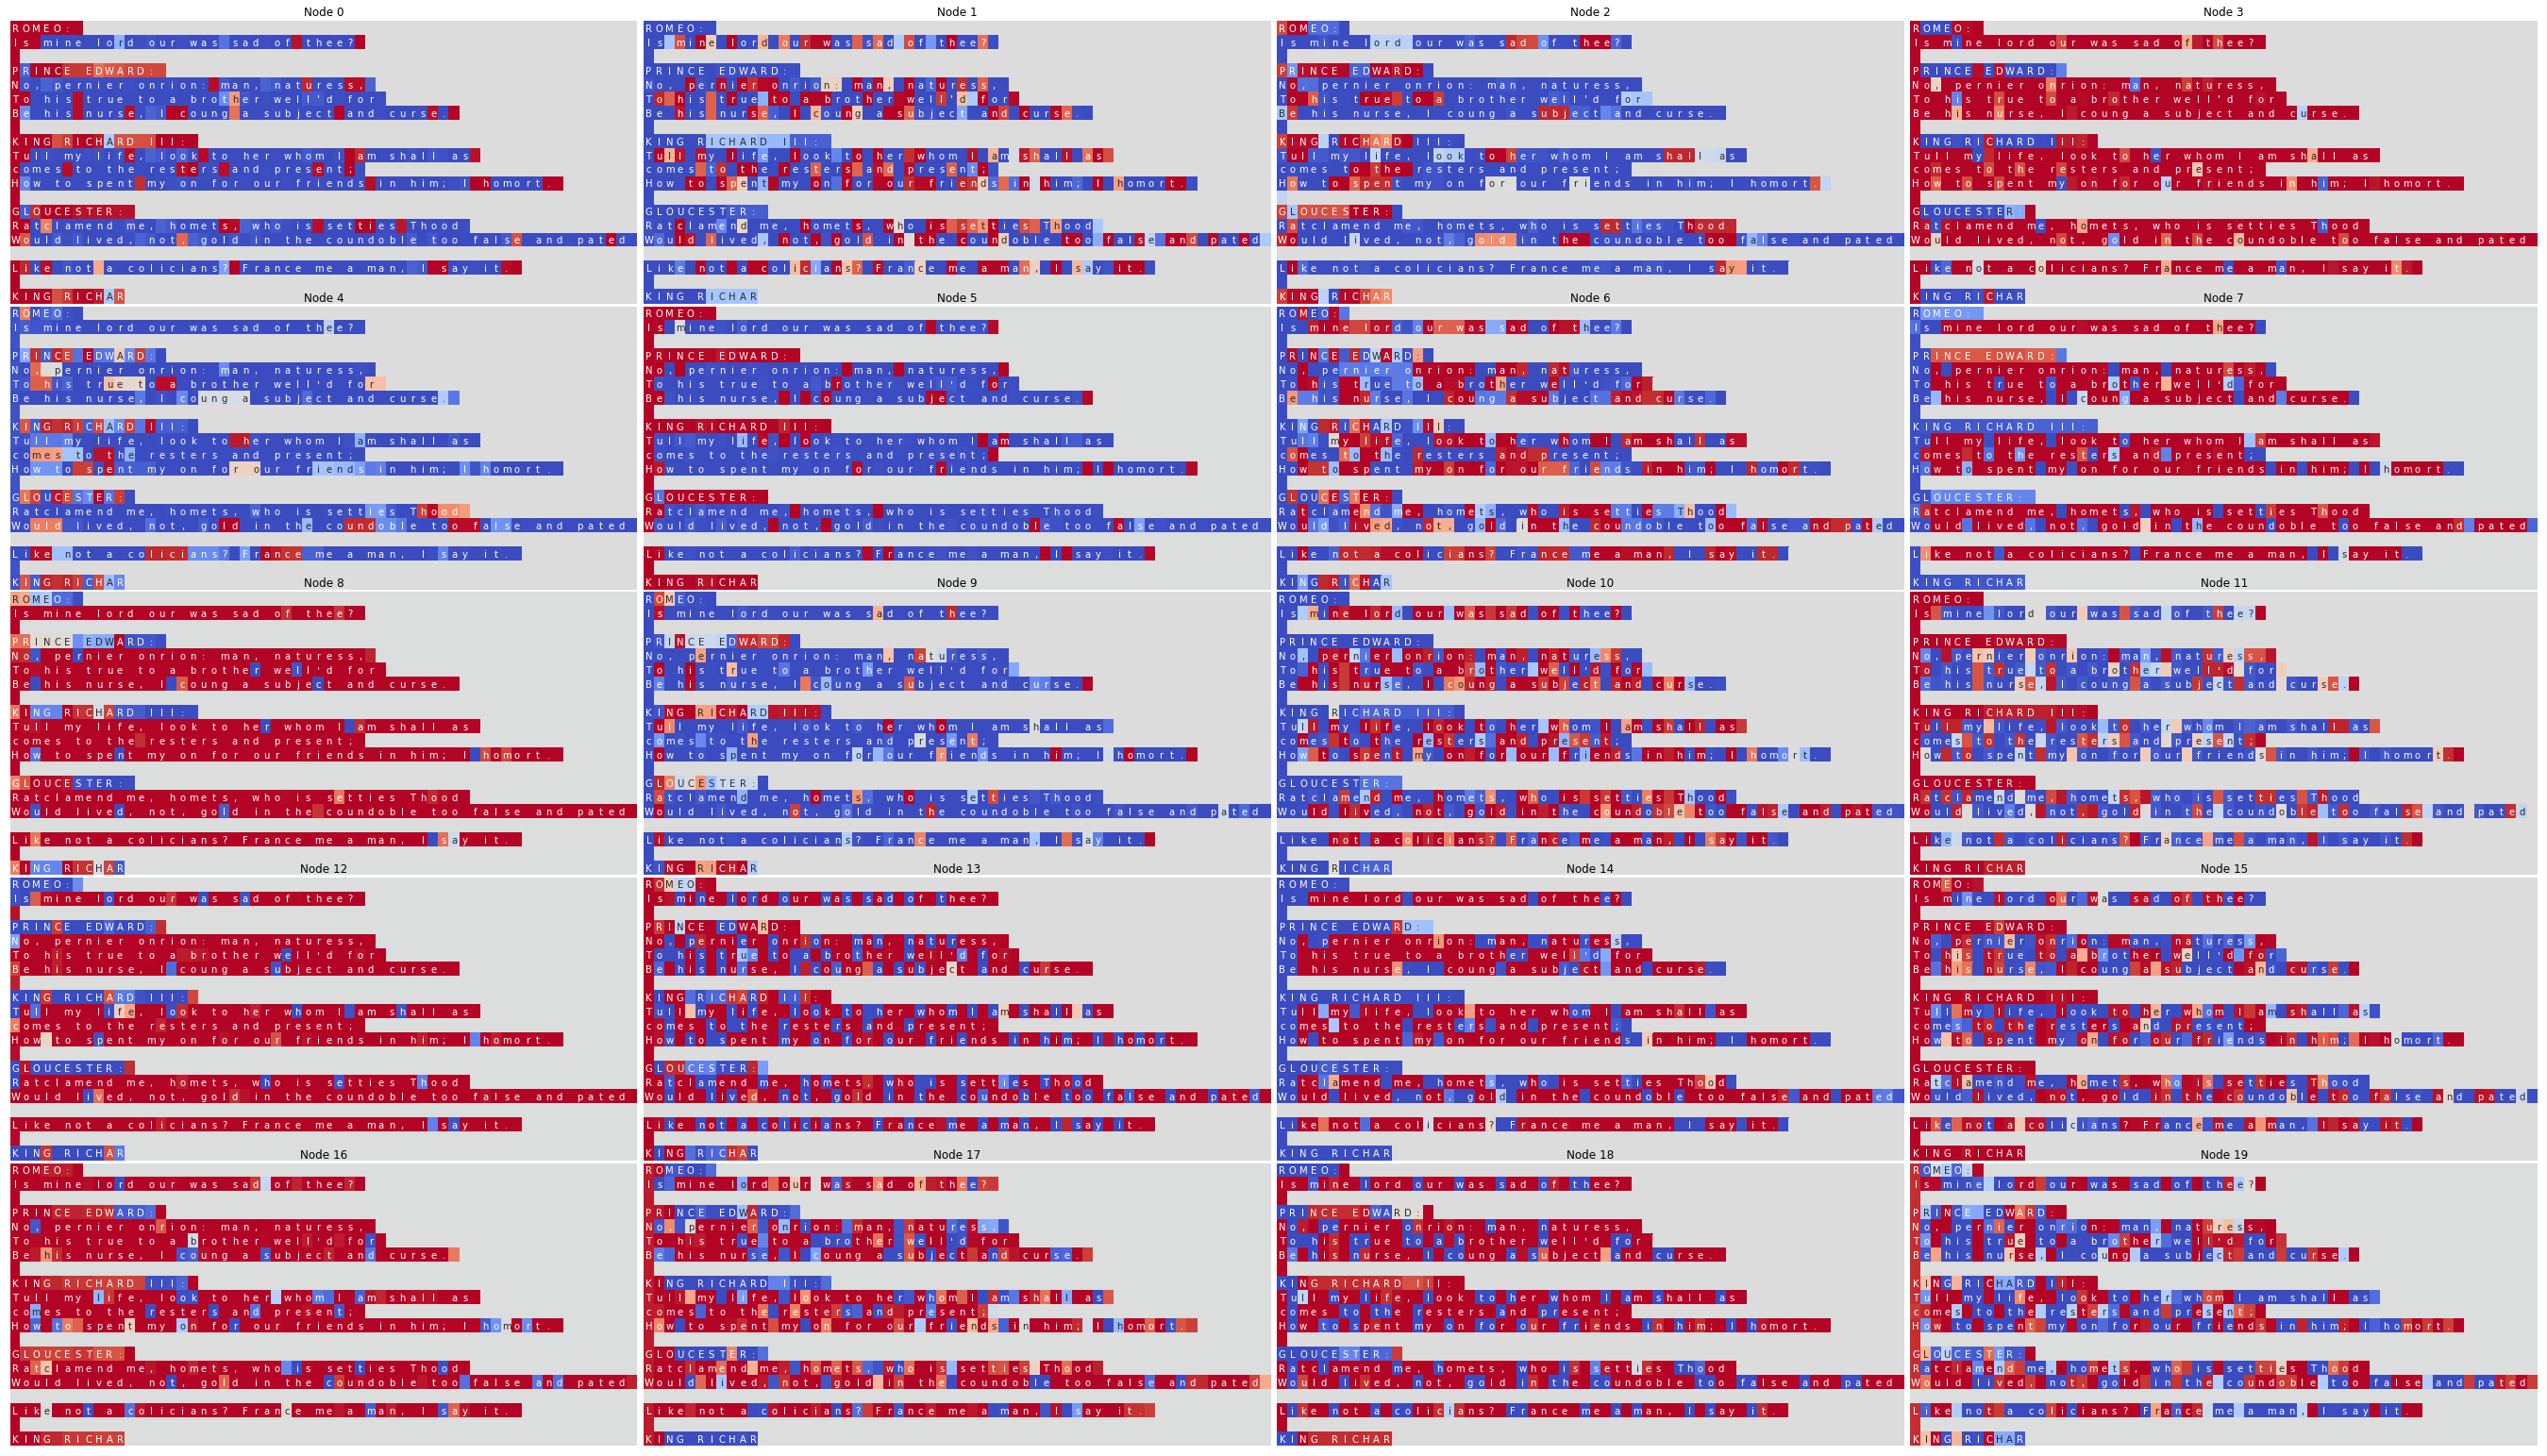

In [13]:
W = 60
big_plot(text, hiddens.T[:20], W=W, zoom=1.0, save_file='plots/neurons-0-20.png')
big_plot(text, hiddens.T[20:40], W=W, zoom=1.0, save_file='plots/neurons-20-40.png')
big_plot(text, hiddens.T[40:60], W=W, zoom=1.0, save_file='plots/neurons-40-60.png')
big_plot(text, hiddens.T[60:80], W=W, zoom=1.0, save_file='plots/neurons-60-80.png')
big_plot(text, hiddens.T[80:100], W=W, zoom=1.0, save_file='plots/neurons-80-100.png')